In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [2]:
# To ignore the warning if we get any
warnings.filterwarnings("ignore")

In [3]:
# Importing the dataset
data = pd.read_csv(r"Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [5]:
# To see top 5 records
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [6]:
# To ge the bottom 5 records
data.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [7]:
# to get the overall view on dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [8]:
# Dimenison of the dataset
data.shape

(246, 14)

### Removing spaces at the end and beginning of the columns

In [9]:
data.columns=data.columns.str.strip()

In [10]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

### Changing data types

In [12]:
data['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31',
       'Sidi-Bel Abbes Region Dataset', 'day'], dtype=object)

In [13]:
data[data['day']=='Sidi-Bel Abbes Region Dataset']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data[data['day']=='day']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [15]:
data=data.drop(index=[122,123])

In [16]:
data['day']=data['day'].astype(int)
data['month']=data['month'].astype(int)
data['year']=data['year'].astype(int)
data['Temperature']=data['Temperature'].astype(int)
data['RH']=data['RH'].astype(int)
data['Ws']=data['Ws'].astype(int)
data['Rain']=data['Rain'].astype(float)
data['FFMC']=data['FFMC'].astype(float)
data['DMC']=data['DMC'].astype(float)

In [17]:
data['DC'].unique()

array(['7.6', '7.1', '6.9', '14.2', '22.2', '30.5', '38.3', '38.8',
       '46.3', '54.3', '61.4', '17', '7.8', '7.4', '8', '16', '27.1',
       '31.6', '39.5', '47.7', '55.8', '63.8', '71.8', '80.3', '88.5',
       '84.4', '92.8', '8.6', '8.3', '9.2', '18.5', '27.9', '37', '40.4',
       '49.8', '9.3', '18.7', '27.7', '37.2', '22.9', '25.5', '34.1',
       '43.1', '52.8', '62.1', '71.5', '79.9', '71.3', '79.7', '88.7',
       '98.6', '108.5', '117.8', '127', '136', '145.7', '10.2', '10',
       '19.8', '29.7', '39.1', '48.6', '47', '57', '67', '77', '75.1',
       '85.1', '94.7', '92.5', '90.4', '100.7', '110.9', '120.9', '130.6',
       '141.1', '151.3', '161.5', '171.3', '181.3', '190.6', '200.2',
       '210.4', '220.4', '180.4', '8.7', '7.5', '7', '15.7', '24', '32.2',
       '30.1', '8.4', '8.9', '16.6', '7.3', '24.3', '33.1', '41.3',
       '49.3', '57.9', '41.4', '30.4', '15.2', '7.7', '16.3', '24.9',
       '8.8', '8.2', '15.4', '17.6', '26.3', '28.9', '14.7', '22.5',
       '

In [18]:
data['DC'].replace('14.6 9',"14.69",inplace=True)

In [19]:
data['FWI'].mode()[0]

'0.4'

In [20]:
data['FWI'].replace('fire   ','0.4',inplace=True)

In [21]:
data['DC']=data['DC'].astype(float)
data['FWI']=data['FWI'].astype(float)
data['ISI']=data['ISI'].astype(float)
data['BUI']=data['BUI'].astype(float)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int32(6), object(1)
memory usage: 22.9+ KB


In [26]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [24]:
# copying data 
data_copy=data.copy()

### Encoding of Classes variable

In [28]:
data_copy['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [38]:
data_copy['Classes']=data_copy['Classes'].str.strip()

In [39]:
data_copy['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [43]:
data_copy[data_copy['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Classers
167,14,7,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,0.4,NaN,NaN


In [45]:
data_copy['Classes'].mode()[0]

'fire'

In [52]:
data_copy['Classes'].replace(data_copy['Classes'][167],data_copy['Classes'].mode()[0],inplace=True)

In [53]:
data_copy['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [56]:
data_copy.drop('Classers',axis=1,inplace=True)

In [57]:
data_copy.head(1)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire


In [64]:
data_copy['Classes']=data_copy['Classes'].map({'fire':1,"not fire":0})

In [65]:
data_copy['Classes'].unique()

array([0, 1], dtype=int64)

In [66]:
data_copy.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0


In [68]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int64  
dtypes: float64(7), int32(6), int64(1)
memory usage: 31.0 KB


In [69]:
data_copy['Classes'].dtype

dtype('int64')

In [70]:
### copy the data
data_clear=data_copy.copy()

In [71]:
data_clear['year'].unique()

array([2012])

In [74]:
data_clear.drop('year',axis=1,inplace=True)

In [75]:
data_clear.head(3)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0


In [77]:
data_copy.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.008197,0.565574
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.437383,0.496700
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [78]:
# To find the correlation between the columns
data_copy.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350909,0.201784
month,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.084119,0.022333
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.558800,0.518119
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.570483,-0.435023
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.029001,-0.066529
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.322810,-0.379449
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.686342,0.770114
DMC,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.874924,0.584188
DC,5.279300e-01,1.276691e-01,NaN,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.740175,0.507132


<AxesSubplot: >

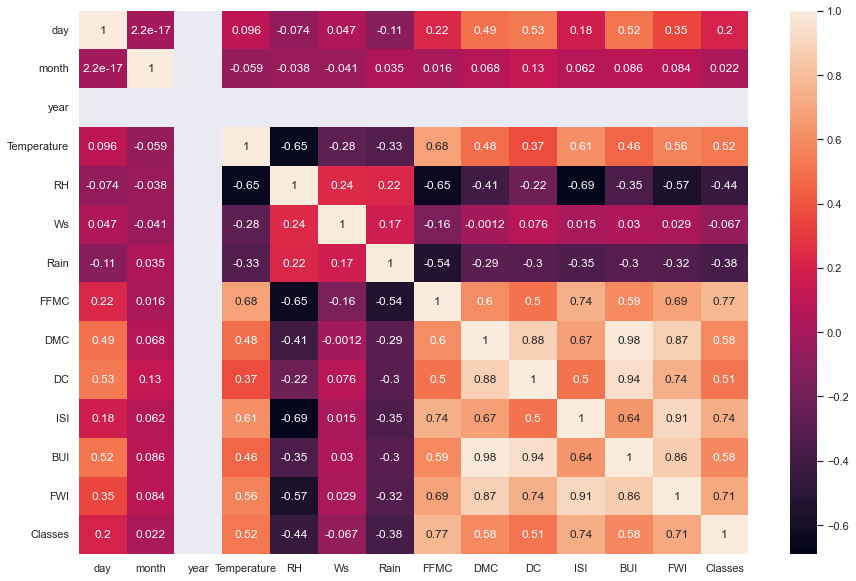

In [79]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data_copy.corr(),annot=True)

### Outliers

<AxesSubplot: >

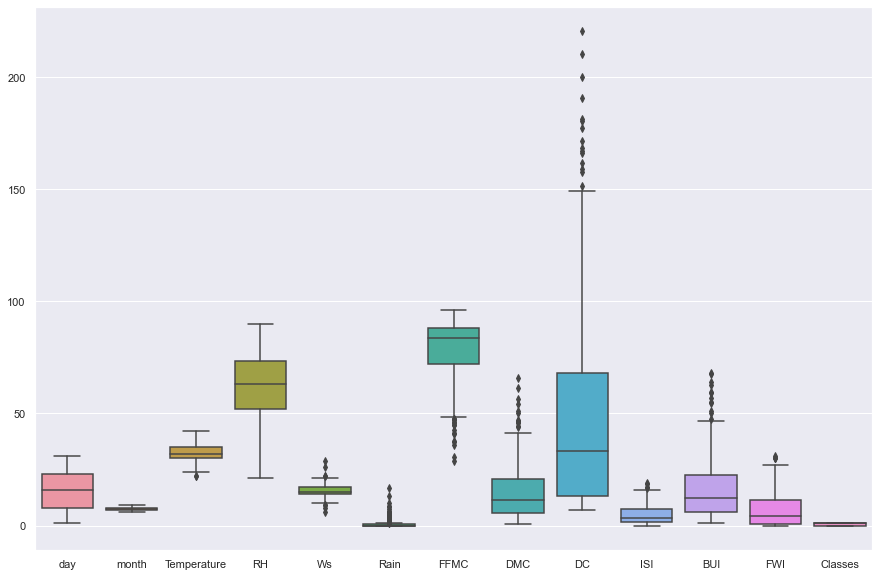

In [80]:
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(data=data_clear)

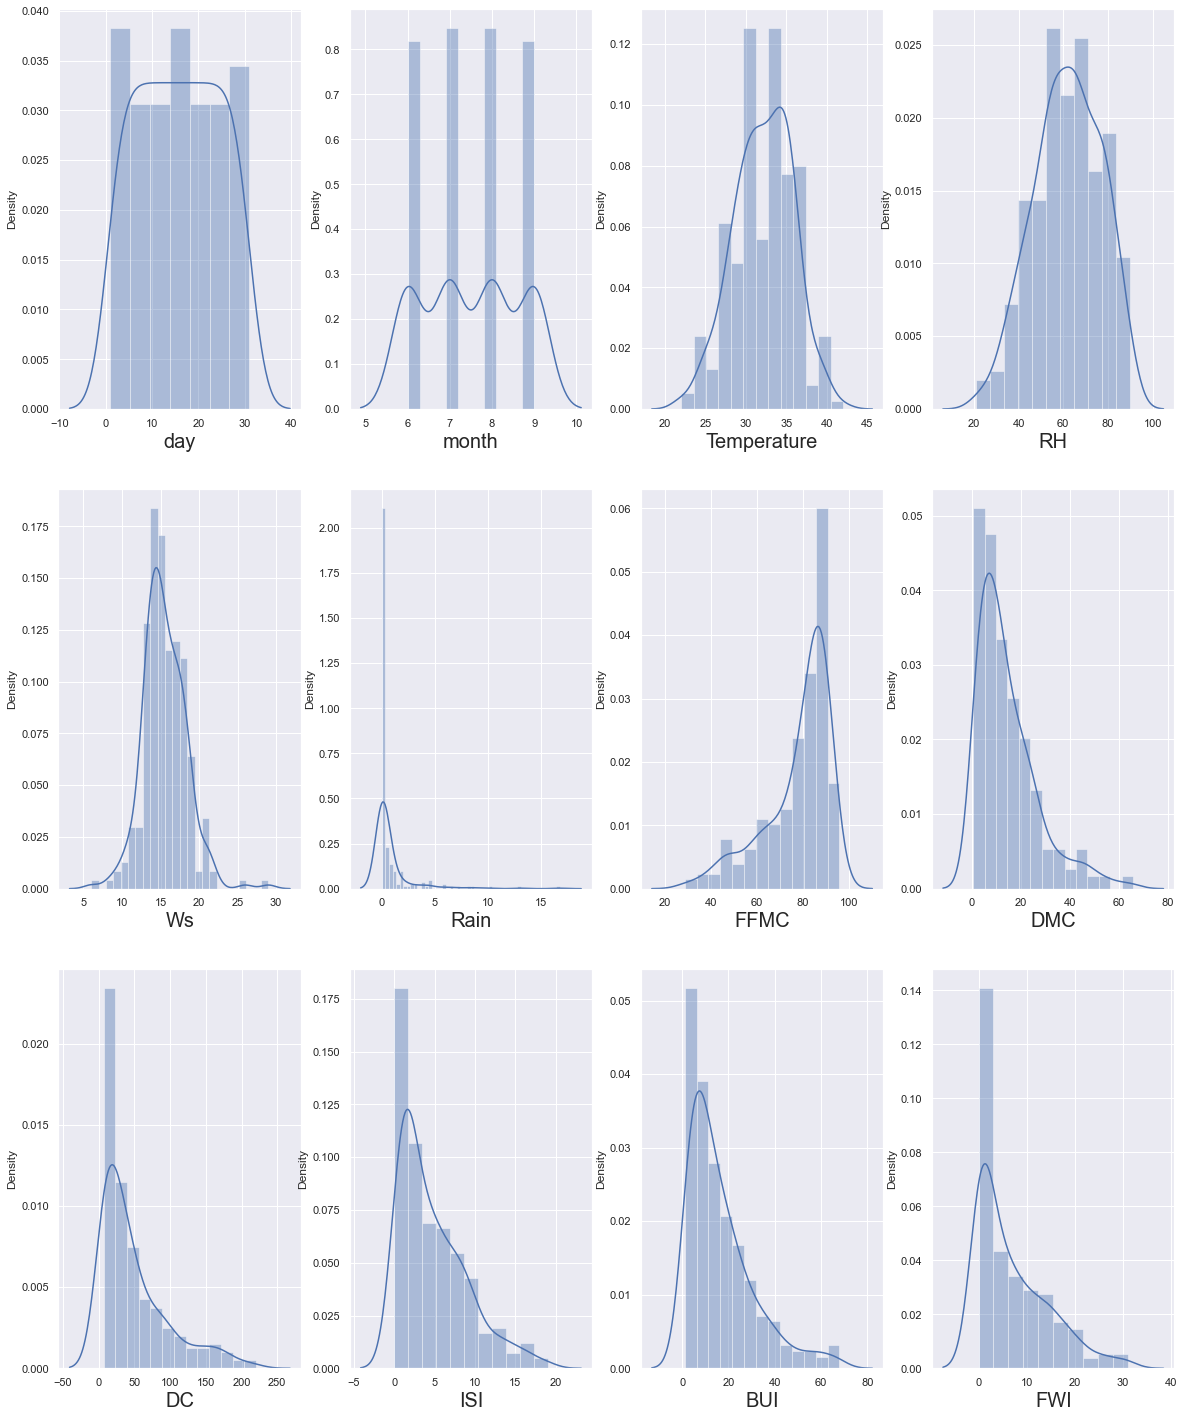

In [82]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_clear.columns:
    if plotnumber<=12 :     # as there are 11 columns in the data
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data_clear[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Handling Outliers

In [83]:
data_outlier=data_clear.copy()

In [84]:
def outlier_threshold(df,variable):
    q1=df[variable].quantile(0.10)
    q2=df[variable].quantile(0.90)
    iqr=q2-q1
    up_limit=q2
    +(1.5*iqr)
    lower_limit=q1-(1.5*iqr)
    return lower_limit,up_limit

In [85]:
def replace_with_threshold(data,numeric_col):
    for variable in numeric_col:
        lower_limit,upper_limit=outlier_threshold(data,variable)
        data.loc[data[variable]<lower_limit,variable]=lower_limit
        data.loc[data[variable]>upper_limit,variable]=upper_limit  

In [86]:
col_outlier=['Ws','Rain','DMC','FFMC','DC','ISI','BUI','FWI']

In [87]:
replace_with_threshold(data_outlier,col_outlier)

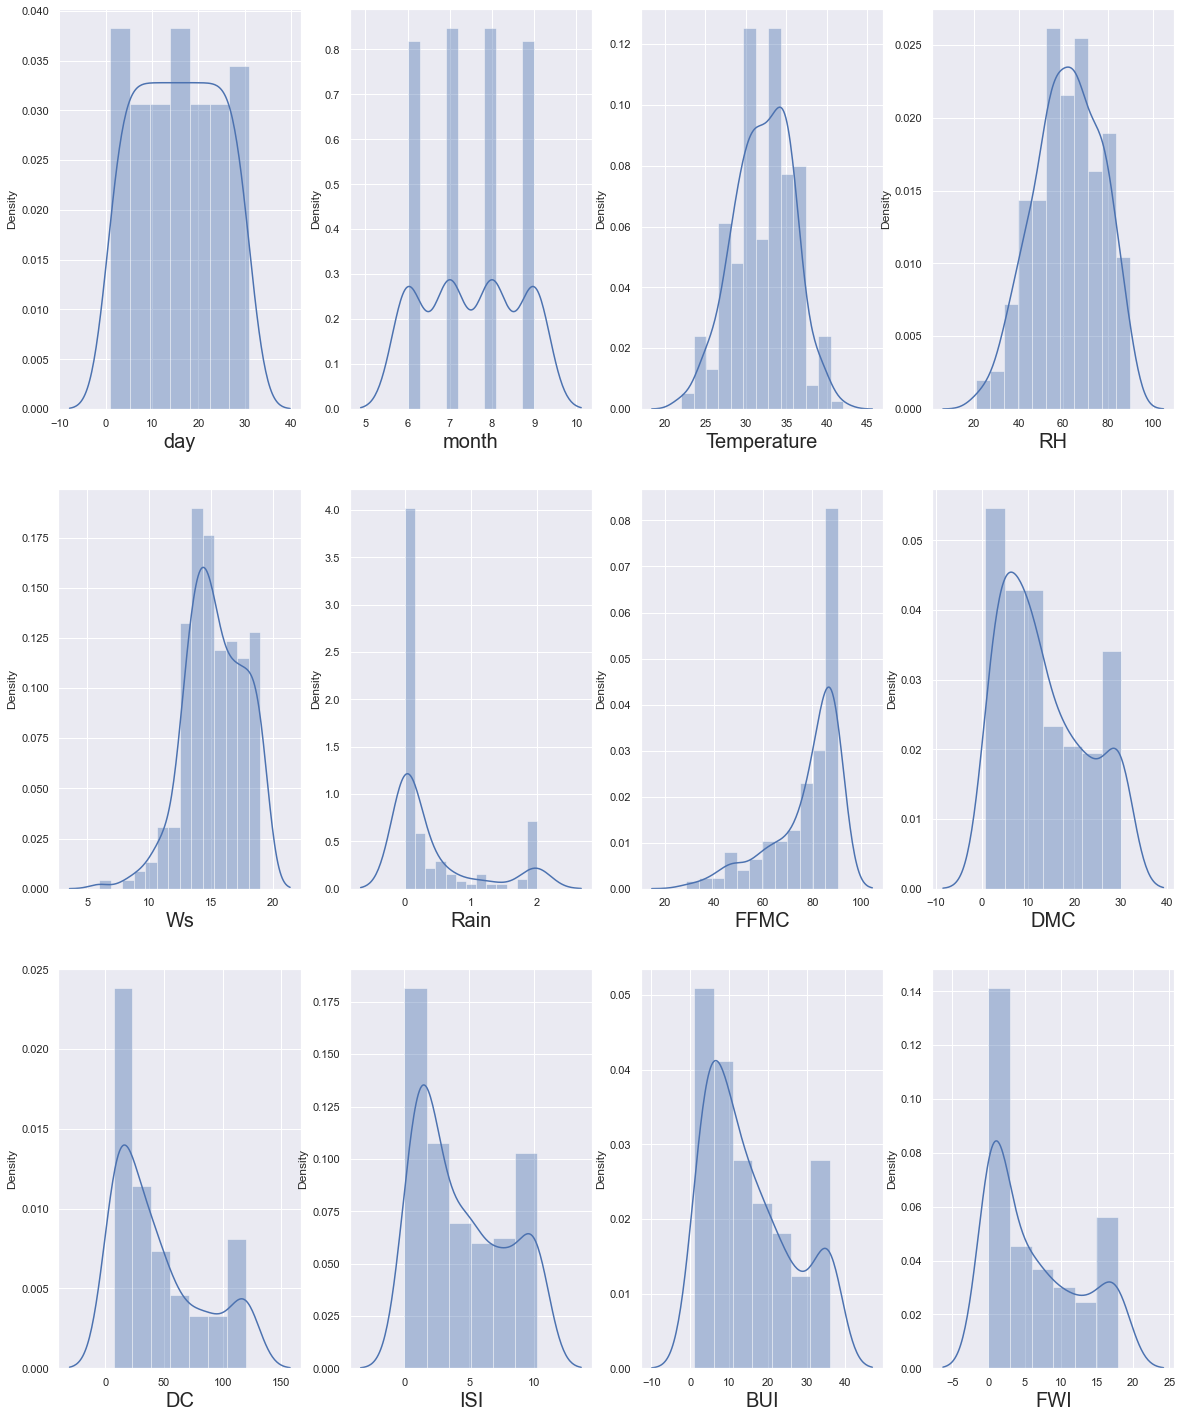

In [89]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_outlier.columns:
    if plotnumber<=12 :     # as there are 11 columns in the data
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data_outlier[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot: >

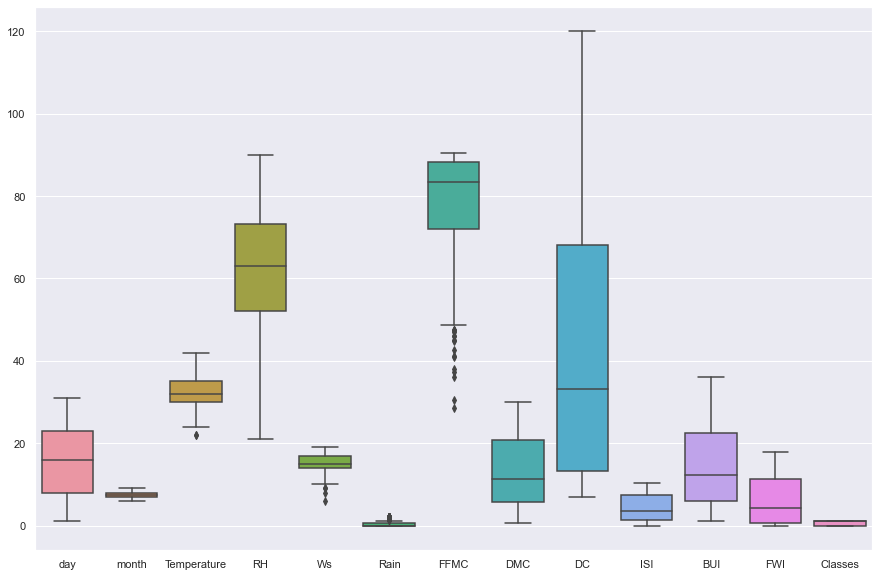

In [90]:
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(data=data_outlier)

In [93]:
# Now we will start building the model on the data before removing some outliers
X=data_outlier.drop(columns=["Classes"])
y=data_outlier['Classes']

In [95]:
X.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,26,82,19,2.0,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,25,89,13,2.0,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [96]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classes, dtype: int64

In [97]:
X.shape , y.shape

((244, 12), (244,))

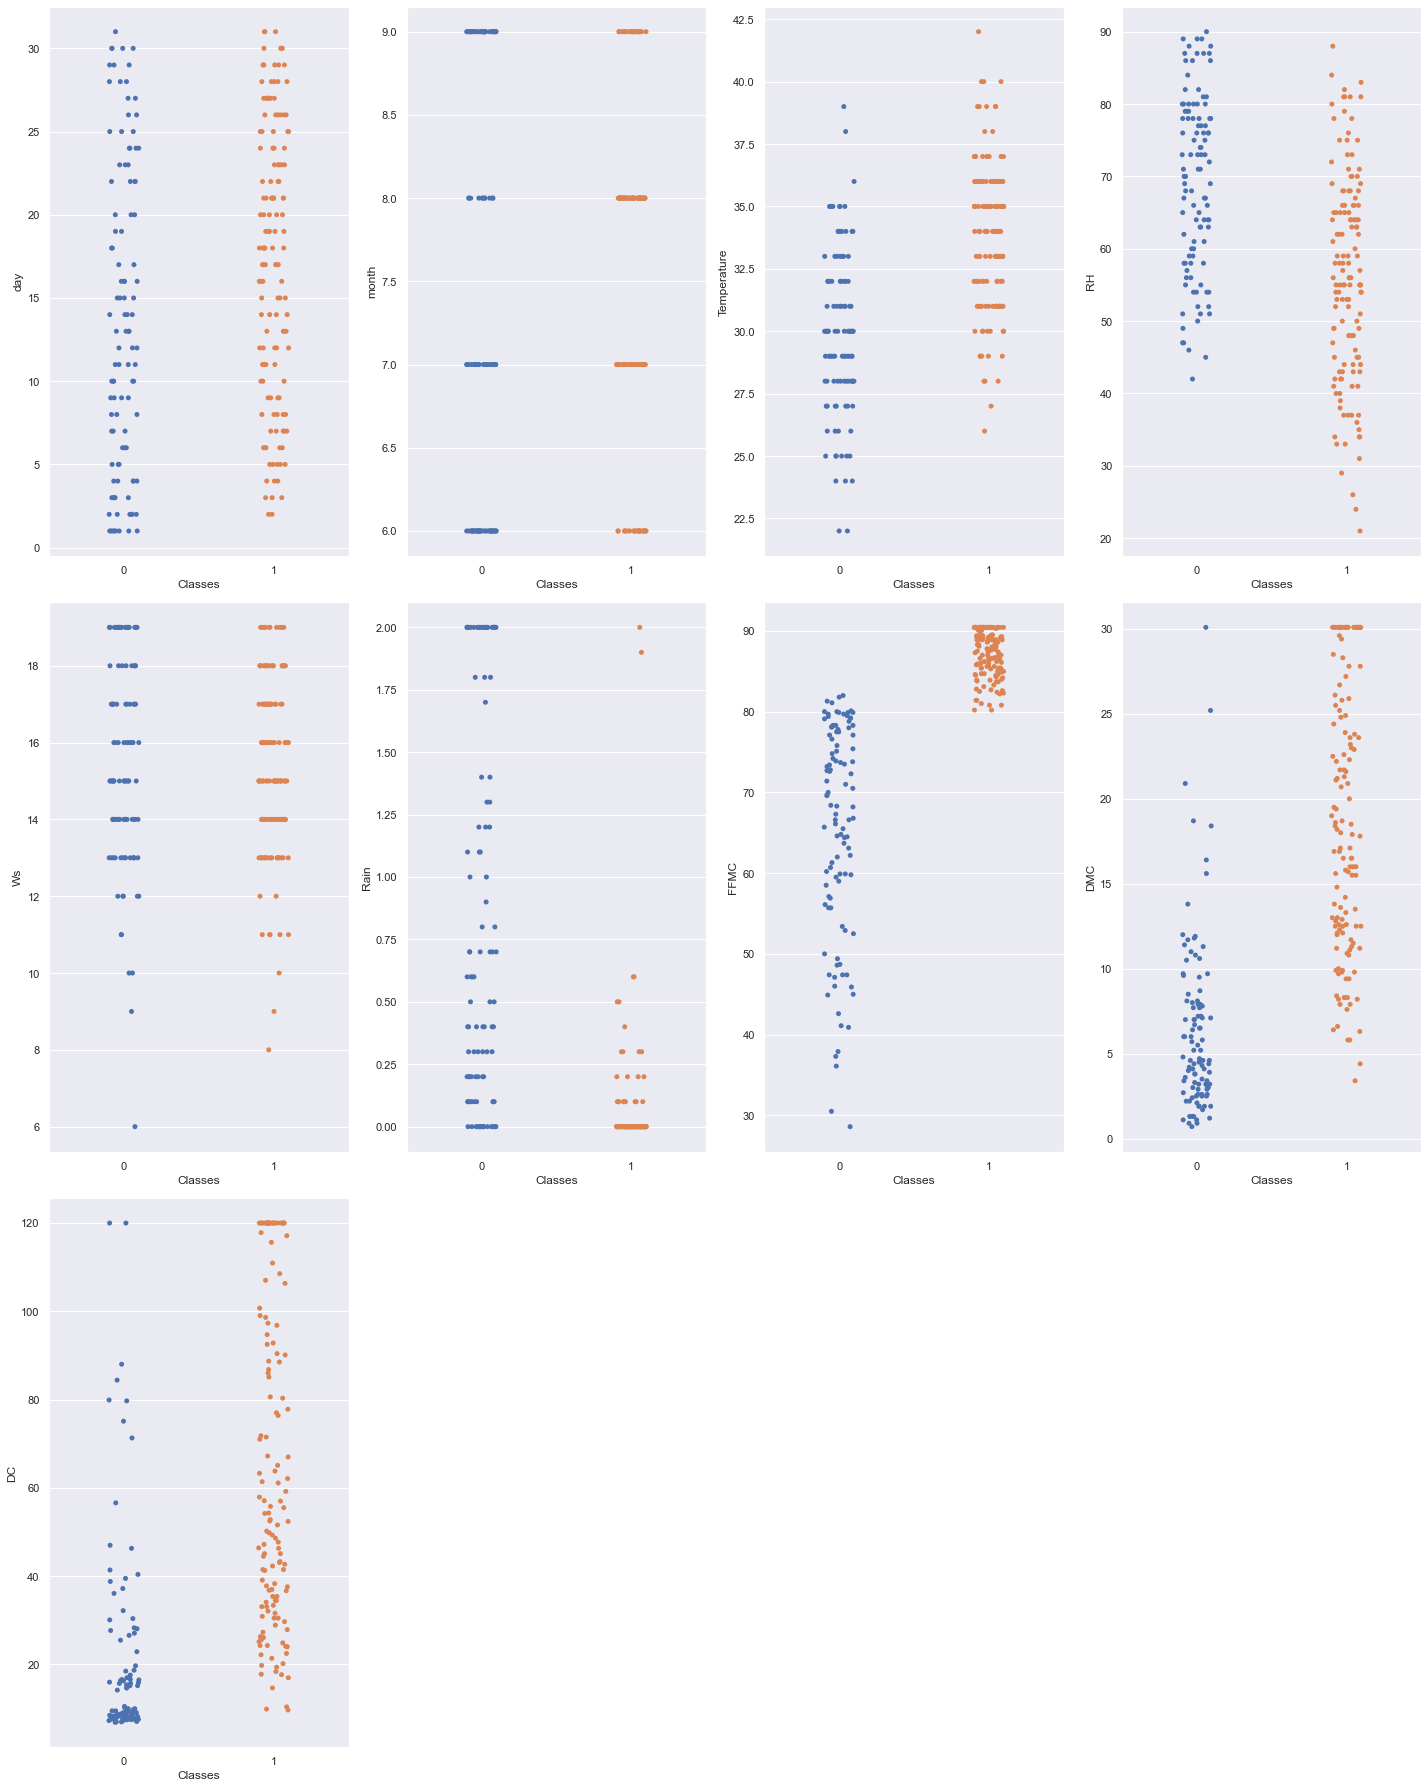

In [98]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,4,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [104]:
#split the train and test data
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=42)

In [109]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((183, 12), (183,), (61, 12), (61,))

In [110]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()

In [115]:
scaler

RobustScaler()

In [113]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.6       ,  1.33333333, -0.54545455, ..., -0.30252101,
        -0.34985423, -0.29333333],
       [ 1.        ,  0.        ,  0.72727273, ...,  0.82352941,
         0.69970845,  0.81777778],
       [-0.2       ,  1.33333333, -0.18181818, ...,  0.08403361,
        -0.1574344 , -0.00888889],
       ...,
       [-0.93333333,  1.33333333, -1.27272727, ..., -0.5210084 ,
        -0.58309038, -0.34666667],
       [ 0.86666667,  0.        ,  0.18181818, ...,  0.57142857,
         0.22740525,  0.44444444],
       [-0.26666667,  1.33333333, -0.36363636, ..., -0.3697479 ,
        -0.54810496, -0.32888889]])

In [114]:
X_test=scaler.transform(X_test)
X_test

array([[ 0.66666667, -0.66666667, -0.18181818,  0.        ,  0.        ,
         0.        ,  0.21428571,  0.19417476,  0.52917009,  0.40336134,
         0.37900875,  0.39111111],
       [-0.53333333, -0.66666667,  0.18181818, -0.48780488, -0.66666667,
         0.        ,  0.2967033 , -0.08414239, -0.01807724,  0.5210084 ,
        -0.05247813,  0.28444444],
       [-0.86666667,  0.        ,  0.18181818, -0.7804878 ,  0.33333333,
         0.        ,  0.26373626, -0.21359223, -0.22678718,  0.58823529,
        -0.23323615,  0.21333333],
       [ 0.93333333,  0.66666667,  0.54545455, -0.53658537,  0.66666667,
         1.        , -0.14285714,  0.61488673,  1.45225965, -0.10084034,
         1.09620991,  0.16888889],
       [ 0.06666667,  0.66666667,  1.45454545, -1.12195122, -1.66666667,
         0.2       ,  0.41978022,  0.73786408,  0.5505341 ,  1.04201681,
         0.72303207,  0.96      ],
       [ 0.66666667,  0.        ,  1.27272727,  0.        , -2.        ,
         2.4       , -

## Model Training

In [123]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [118]:
log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

LogisticRegression()

In [120]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)

In [121]:
# Let see how out data performs on the test data
y_pred = log_reg.predict(X_test)

In [124]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9508196721311475

In [125]:
# Training accuracy
log_reg.score(X_train,y_train)

0.9726775956284153

In [126]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[23,  1],
       [ 2, 35]], dtype=int64)

In [127]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [128]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9508196721311475

In [129]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9583333333333334

In [130]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.92

In [131]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9387755102040817

## Without touching Outliers

In [132]:
# Now we will start building the model on the data before removing some outliers
X=data_clear.drop(columns=["Classes"])
y=data_clear['Classes']

In [133]:
X.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [134]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classes, dtype: int64

In [135]:
X.shape , y.shape

((244, 12), (244,))

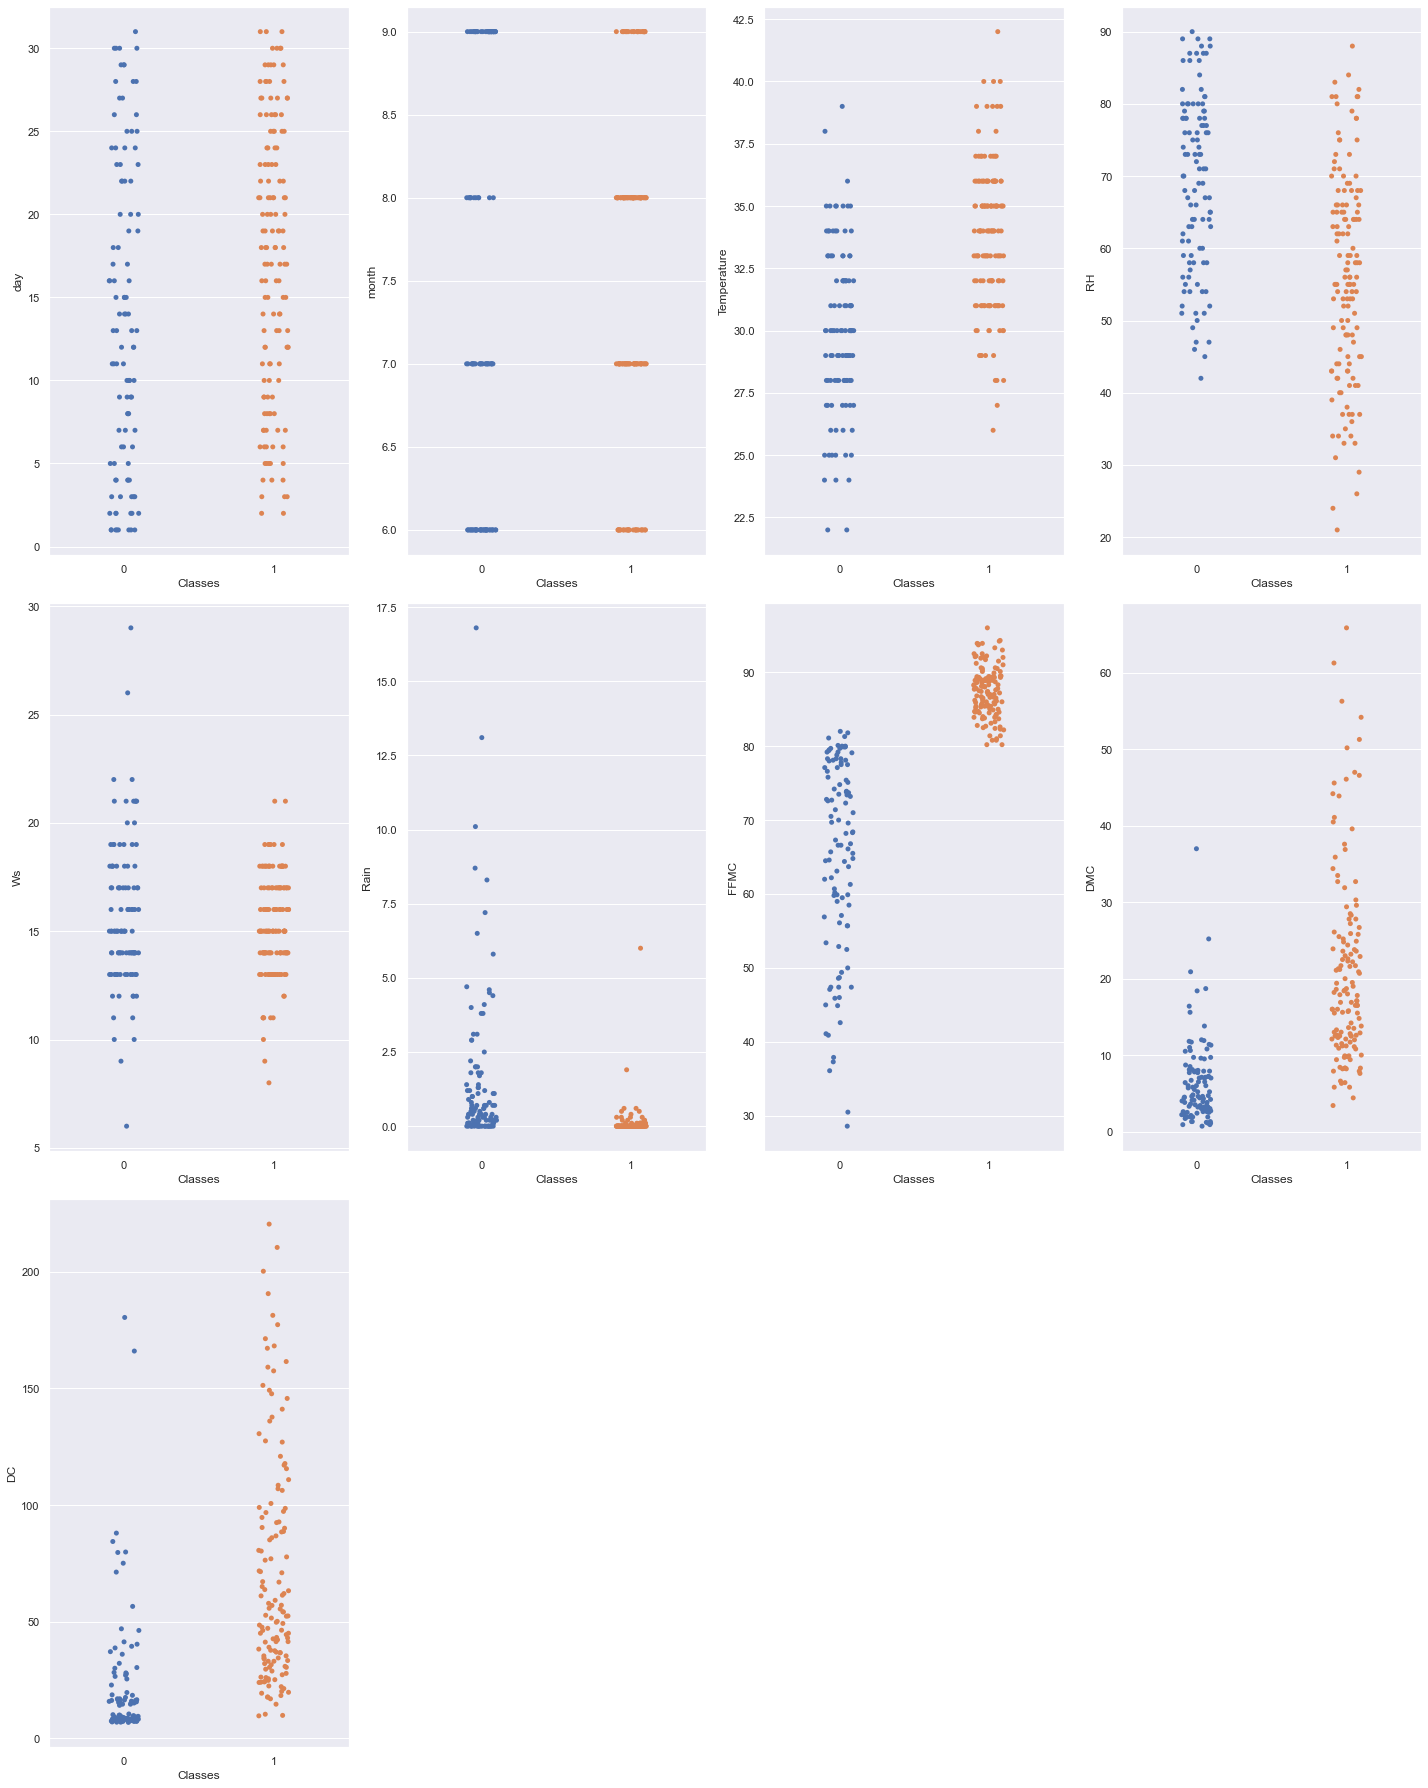

In [136]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,4,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [137]:
#split the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=42)

In [138]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((183, 12), (183,), (61, 12), (61,))

### Scaling the data

In [140]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()

In [141]:
scaler

RobustScaler()

In [142]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.6       ,  1.33333333, -0.54545455, ..., -0.30252101,
        -0.34985423, -0.29333333],
       [ 1.        ,  0.        ,  0.72727273, ...,  0.82352941,
         0.69970845,  0.81777778],
       [-0.2       ,  1.33333333, -0.18181818, ...,  0.08403361,
        -0.1574344 , -0.00888889],
       ...,
       [-0.93333333,  1.33333333, -1.27272727, ..., -0.5210084 ,
        -0.58309038, -0.34666667],
       [ 0.86666667,  0.        ,  0.18181818, ...,  0.57142857,
         0.22740525,  0.44444444],
       [-0.26666667,  1.33333333, -0.36363636, ..., -0.3697479 ,
        -0.54810496, -0.32888889]])

In [143]:
X_test=scaler.transform(X_test)
X_test

array([[ 6.66666667e-01, -6.66666667e-01, -1.81818182e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.14285714e-01,  1.94174757e-01,  5.29170090e-01,
         4.03361345e-01,  3.79008746e-01,  3.91111111e-01],
       [-5.33333333e-01, -6.66666667e-01,  1.81818182e-01,
        -4.87804878e-01, -6.66666667e-01,  0.00000000e+00,
         2.96703297e-01, -8.41423948e-02, -1.80772391e-02,
         5.21008403e-01, -5.24781341e-02,  2.84444444e-01],
       [-8.66666667e-01,  0.00000000e+00,  1.81818182e-01,
        -7.80487805e-01,  3.33333333e-01,  0.00000000e+00,
         2.63736264e-01, -2.13592233e-01, -2.26787182e-01,
         5.88235294e-01, -2.33236152e-01,  2.13333333e-01],
       [ 9.33333333e-01,  6.66666667e-01,  5.45454545e-01,
        -5.36585366e-01,  6.66666667e-01,  1.00000000e+00,
        -1.42857143e-01,  6.14886731e-01,  1.93262120e+00,
        -1.00840336e-01,  1.09620991e+00,  1.68888889e-01],
       [ 6.66666667e-02,  6.66666667e-01,  1.4545454

## Model Training

In [144]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [145]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [146]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction1.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar1.sav', 'wb') as f:
    pickle.dump(scaler,f)

In [147]:
# Let see how out data performs on the test data
y_pred = log_reg.predict(X_test)

In [148]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9672131147540983

In [149]:
# Training accuracy
log_reg.score(X_train,y_train)

0.9672131147540983

In [150]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[24,  0],
       [ 2, 35]], dtype=int64)

In [151]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [152]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9672131147540983

In [153]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [154]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.9230769230769231

In [155]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9600000000000001